<a href="https://colab.research.google.com/github/TikaGurung/GST_Field_Data_Analysis/blob/main/field_data_for_permafrost_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

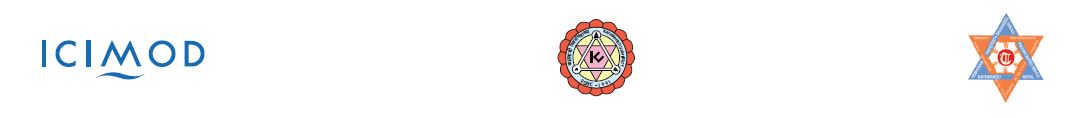

**<div align="center"><font size="4">REGIONAL TRAINING</font>**




<div align="center"><font size="4">Analysing permafrost in the Hindu Kush Himalaya using open access tools</font>

**<h1 align='center'>Field-based ground surface temperature data**


*This notebook is prepared for the participants of the regional training on **Analysing permafrost in the Hindu Kush Himalaya using open access tools** organized by ICIMOD through its Cryosphere Initiative under the Regional Programme on River Basins and Cryosphere in collaboration with Kathmandu university and Tribhuvan University.*

*The Cryosphere Initiative is supported by the Government of Norway and Swiss Agency for Development and Cooperation.*

Coded by: Tika Ram Gurung                            
Email: tika.gurung@icimod.org                 
GitHub: https://github.com/TikaGurung/GST_Field_Data_Analysis

---

Ground Surface Temperature (GST) is defined as the surface or near-surface 
temperature, measured in the uppermost centimetres of the ground. GST has to be distinguished from the Bottom Temperature of Snow cover (BTS), which is measured at the snow/ground interface.

GST is not a measure of permafrost in the strict sense and corresponds to the temperature at the top of the active layer. However, it is an important parameter for the understanding of the thermal evolution of both active layer and permafrost, or of frozen ground in general.

The analysis of the thermal regime gives valuable information about freezing and thawing occurrence of the ground. Mean annual ground surface temperature (MAGST), basal-ripening date (RD), melt-out date (MD) are some of the usual parameters for characterization of ground surface temperature conditions of the given location.

> Mean annual ground surface temperature (MAGST) can be used as a unique average value. It should theoretically be negative in active permafrost areas but can be close to zero in permafrost boundary conditons.

> Basal-ripening Date (RD) is the time when a frozen ground surface is warmed to zero-degree C by melt-water percolation or by strong rain-on-snow events. RD can only be detected in situations having negative temperatures at the snow-ground interface.

> Melt-out date (MD) is the time when the snow cover is depleted and no further
release of meltwater occurs, allowing the ground surface to warm above zero-degree C.

In this exercise, the example data set is taken from the Lantang region, which is downloaded from the [ICIMOD RDS](https://rds.icimod.org/Home/Data?any=langtang&Category=datasets) as described in the [paper](https://onlinelibrary.wiley.com/doi/full/10.1002/hyp.14189). And we calculate and determine the MAGST, RD and MD of the different locations for each year.

### Required Packages
This hands-on exercise requires the ***xts***, ***zoo***, ***matrixStats***, ***png*** and ***RgoogleMaps*** packages. Let's install and load them.

In [ ]:
# install required packages
install.packages(c('xts','zoo','matrixStats','png','RgoogleMaps')) # takes nearly 2 minutes

In [ ]:
#load libraries
library(xts) # 
library(zoo)
library(matrixStats)
library(png)
library(RgoogleMaps)

### Defining working directory
The working directory is set by creating two folders, one for processing data and another for the final product. The processed data folder is used as input directory for calculating RD, MD and MAGST.

In [ ]:
getwd()
dir.create('output_processed_data')
in_path='/content/output_processed_data/'

dir.create('output_final_product')
out_path='/content/output_final_product/'

### Loading data
The downloaded GST data set is prepared into two sheets in .csv format based on the installation year 2016 and 2014, respectively. We have taken only the data from the GeoPrecison loggers. We also imported the air temperature data from the Yala Glacier Base Camp, which is located nearby all the sensor's location.

In [ ]:
##reading csv data
#2016 data set
csv2016 <- read.csv('https://raw.githubusercontent.com/TikaGurung/GST_Field_Data_Analysis/main/Geoprecision2016_GST_Data_Langtang_ICIMOD.csv',header = T)
#2014 data set
csv2014 <- read.csv('https://raw.githubusercontent.com/TikaGurung/GST_Field_Data_Analysis/main/Geoprecision2014_GST_Data_Langtang_ICIMOD.csv',header = T)
#Yala BC data set
AWSYalaBC <- read.csv('https://raw.githubusercontent.com/TikaGurung/GST_Field_Data_Analysis/main/AWSYalaBC.csv',header = T)
#Coordinates
Langtang<-read.csv('https://raw.githubusercontent.com/TikaGurung/GST_Field_Data_Analysis/main/Coordinatess%20of%20each%20sesnors.csv',header = T)

## reading name of each loggere for both data sets
names2016 <- colnames(csv2016)
names2014 <- colnames(csv2014)

#visualize the data structure
View(csv2016)
print(names2016)

##Air temperature of Yala Glacier Base Camp
Air temperature from Yala Glacier Base Camp AWS is taken to compare with the GST.

In [ ]:
YalaBC_Time <- as.POSIXlt(paste(AWSYalaBC$DATE,AWSYalaBC$TIME),format = "%m/%d/%Y %H:%M",tz='')
df.AirTemp <- as.xts(AWSYalaBC$TAIR, order.by=as.Date(YalaBC_Time, format='%Y-%m-%d %H:%M'))
daily_AirTemp <- apply.daily(df.AirTemp, mean,na.rm=T)
Yala_DailyAirT <- as.numeric(coredata(daily_AirTemp)) #extracting data only
Yala_daily_TIME <- as.POSIXct(index(daily_AirTemp))

## Creating empty data frame for separating yearly data
An empty data frame with one column is created for each year data for both the data sets. Later this empty data frame is used to combine the processed data from each sensor of different time periods.

In [ ]:
##2016 data
MAGST2016 <- data.frame(seq(2017,2018));colnames(MAGST2016)="date"

GST2016_2017 <- data.frame(NA);colnames(GST2016_2017)="date"
GST2016_2018 <- data.frame(NA);colnames(GST2016_2018)="date"

Daily2016_2017 <- data.frame(NA);colnames(Daily2016_2017)="date"
Daily2016_2018 <- data.frame(NA);colnames(Daily2016_2018)="date"

SD2016_2018 <- data.frame(NA);colnames(SD2016_2018)="date"
SD2016_2017 <- data.frame(NA);colnames(SD2016_2017)="date"

##2014 data
MAGST2014 <- data.frame(seq(2015,2018));colnames(MAGST2014)="date"

GST2014_2015 <- data.frame(NA);colnames(GST2014_2015)="date"
GST2014_2016 <- data.frame(NA);colnames(GST2014_2016)="date"
GST2014_2017 <- data.frame(NA);colnames(GST2014_2017)="date"
GST2014_2018 <- data.frame(NA);colnames(GST2014_2018)="date"

SD2014_2015 <- data.frame(NA);colnames(SD2014_2015)="date"
SD2014_2016 <- data.frame(NA);colnames(SD2014_2016)="date"
SD2014_2017 <- data.frame(NA);colnames(SD2014_2017)="date"
SD2014_2018 <- data.frame(NA);colnames(SD2014_2018)="date"


##Separation of GST: 2016 dataset
The GST data set is prepared into yearly data and additionally a daily standard deviation is calculated. The hourly GST, daily GST and daily standard deviation of each sensor is plotted against the time. Furthermore, MAGST is calculated of each sensor for different years. We have prepared yearly data since we will be using the dataset as input files later to determine RD, MD and MAGST.

In [ ]:
par(mfrow=c(4,4)) ## to plot all the data

for (i in 2:length(names2016)) {
  ##selecting hydrological year, November to October due to the data availability period  
  TIME<-as.POSIXlt(strptime(csv2016$TIME,format= "%m/%d/%Y %H:%M",tz=''))
  GST<-csv2016[,i][TIME>="2016-11-1" & TIME<"2018-10-31"] #GST
  TIME<-TIME[TIME>="2016-11-1" & TIME<"2018-10-31"] #Date
  ###
  
  Sensor<-data.frame(TIME,GST)
  ## Create xts object
  df.xts <- as.xts(Sensor[,2], order.by=as.Date(Sensor[,1], format='%Y-%m-%d %H:%M'))
  SD<-apply.daily(df.xts, sd) #aggregate(. ~ TIME, Sensor,FUN=sd) 
  StanDev<-as.numeric(coredata(SD)) #extracting data only
  daily_TIME<-as.POSIXct(index(SD)) #data.frame(daily_TIME=index(SD), StanDev=coredata(SD))
  
  daily_GST<-apply.daily(df.xts, mean)
  daily_GST<-as.numeric(coredata(daily_GST))
  
  ##calculating MAGST2016, no proper data
  yearly_mean<-aggregate(GST, by = list(TIME$year), FUN = mean)
  
  GST2017 <- subset(GST, TIME >= as.POSIXct('2016-11-01') & TIME <= as.POSIXct('2017-11-01'))
  TIME2017 <- subset(TIME, TIME >= as.POSIXct('2016-11-01') & TIME <= as.POSIXct('2017-11-01'))
  GST2017<-data.frame(TIME2017,GST2017);colnames(GST2017)=c('date','GST')
  
  GST2018 <- subset(GST, TIME >= as.POSIXct('2017-11-01') & TIME <= as.POSIXct('2018-11-01'))
  TIME2018 <- subset(TIME, TIME >= as.POSIXct('2017-11-01') & TIME <= as.POSIXct('2018-11-01'))
  GST2018<-data.frame(TIME2018,GST2018);colnames(GST2018)=c('date','GST')
  
  Daily2017 <- subset(daily_TIME, daily_TIME >= as.POSIXct('2016-11-01') & daily_TIME <= as.POSIXct('2017-11-01'))
  Daily_GST_2017 <- subset(daily_GST, daily_TIME >= as.POSIXct('2016-11-01') & daily_TIME <= as.POSIXct('2017-11-01'))
  Daily_GST_2017<-data.frame(Daily2017,Daily_GST_2017);colnames(Daily_GST_2017)=c('TIME',names2016[i])
  
  SD2017 <- subset(StanDev, daily_TIME >= as.POSIXct('2016-11-01') & daily_TIME <= as.POSIXct('2017-11-01'))
  SD2017<-data.frame(Daily2017,SD2017);colnames(SD2017)=c('TIME',names2016[i])
  
  Daily2018 <- subset(daily_TIME, daily_TIME >= as.POSIXct('2017-11-01') & daily_TIME <= as.POSIXct('2018-11-01'))
  Daily_GST_2018 <- subset(daily_GST, daily_TIME >= as.POSIXct('2017-11-01') & daily_TIME <= as.POSIXct('2018-11-01'))
  Daily_GST_2018<-data.frame(Daily2018,Daily_GST_2018);colnames(Daily_GST_2018)=c('TIME',names2016[i])
  
  SD2018 <- subset(StanDev, daily_TIME >= as.POSIXct('2017-11-01') & daily_TIME <= as.POSIXct('2018-11-01'))
  SD2018<-data.frame(Daily2018,SD2018);colnames(SD2018)=c('TIME',names2016[i])
  
  ##MAGST2016 calculation 
  Temp<-data.frame(seq(2017,2018),c(mean(GST2017$GST,na.rm = T),mean(GST2018$GST,na.rm = T)))
  colnames(Temp)<-c('TIME',names2016[i])
  
  MAGST2016<-cbind(MAGST2016, Temp[2])
  
  ##Data separation for future use
  
  colnames(GST2017)<-c('TIME',names2016[i])
  colnames(GST2018)<-c('TIME',names2016[i])
  
  ##GST hourly
  GST2016_2017<-cbind(GST2016_2017, GST2017[2])
  GST2016_2018<-cbind(GST2016_2018, GST2018[2])
  
  ##SD
  SD2016_2017<-cbind(SD2016_2017, SD2017[2])
  SD2016_2018<-cbind(SD2016_2018, SD2018[2])
  
  ##GST daily
  Daily2016_2017<-cbind(Daily2016_2017, Daily_GST_2017[2])
  Daily2016_2018<-cbind(Daily2016_2018, Daily_GST_2018[2])
  
  #par(mfrow = c(1,1),mar=c(4.5,4,2,4)+0.25)
  plot(TIME,GST,type = 'l',col='grey',ylab = '',xlab = '')
  lines(daily_TIME,daily_GST,col='red')
  abline(h=0,lwd=1,lty=3)
  mtext(expression(GST~(degree~C)),side=2,line=3,col='grey')
  par(new=TRUE)
  plot(daily_TIME,StanDev,type='l', ylim = c(0,40),xaxt="n",col="blue",yaxt="n",xlab="",ylab="")
  axis(4)
  mtext('StanDev',side=4,line=3,col='blue')
  title(paste('Geoprecision',names2016[i]))
}


##import date
GST2016_2017$date<-TIME2017;GST2016_2017=head(GST2016_2017,-1)
GST2016_2018$date<-TIME2018;GST2016_2018=head(GST2016_2018,-1)

SD2016_2017$date<-Daily2017
SD2016_2018$date<-Daily2018

Daily2016_2017$date<-Daily2017
Daily2016_2018$date<-Daily2018

It seems that all sensors are there - but let's quickly have a look at a single sensor to get a grip on all labels, axis etc. We will then go into more detail further below.

In [ ]:
  #par(mfrow = c(1,1),mar=c(4.5,4,2,4)+0.25)
  plot(TIME,GST,type = 'l',col='grey',ylab = '',xlab = '')
  lines(daily_TIME,daily_GST,col='red')
  abline(h=0,lwd=1,lty=3)
  mtext(expression(GST~(degree~C)),side=2,line=3,col='grey')
  par(new=TRUE)
  plot(daily_TIME,StanDev,type='l', ylim = c(0,50),xaxt="n",col="blue",yaxt="n",xlab="",ylab="")
  axis(4)
  mtext('StanDev',side=4,line=1,col='blue')
  title(paste('Geoprecision',names2016[6]))

###Export the separated data
The prepared yearly GST data and MAGST data are exported to the processed data folder.



In [ ]:
head(GST2016_2017) #view the heading of data set

In [ ]:
print(MAGST2016) #view the data set

In [ ]:
##exporting data
write.csv(GST2016_2017, paste(in_path,"GST2016_2017.csv",sep = ''), row.names=FALSE, quote=FALSE)
write.csv(GST2016_2018, paste(in_path,"GST2016_2018.csv",sep = ''), row.names=FALSE, quote=FALSE)

write.csv(MAGST2016, paste(out_path,"MAGST2016.csv",sep = ''), row.names=FALSE, quote=FALSE)

### Evaluating data of a single sensor
To go for a clearer visualization and to really understand processes we'll just have a look at a single sensor below. Here we have also added the air temperature data from the Yala Glacier BC and calculated mean annnul air temperature (MAAT) to compare with MAGST. You can already get a sense of RD, MD, zero curtain and the snow-cover period from the plot. You can comapare your prediction of RD and MD at the end of the session as well. You can also play with different sensor of each year, by changing around the *j* variable in the first line. Explore a number of them and see the differences.

What do you see? Are variabilities and seasonalities what you expect? What about the standard deviation? How is air and ground temperature linked? Where are they disconnected?

In [ ]:
j=2 #first column data, you can alter the number
par(mfrow = c(1,1),mar=c(4.5,4,2,4)+0.25)
plot(GST2016_2017$date,GST2016_2017[,j],type = 'l',ylim = c(-20,10),col='grey',ylab = expression(Temperature~(degree~C)),xlab = 'Date',xaxt='n')
lines(Daily2017,Daily2016_2017[,j],col='red')
#air temp, prepare according to the GST data
Yala_daily_TIME_2017=subset(Yala_daily_TIME, Yala_daily_TIME >= as.POSIXct('2016-11-01') & Yala_daily_TIME <= as.POSIXct('2017-11-01'))
Yala_DailyAirT_2017=subset(Yala_DailyAirT, Yala_daily_TIME >= as.POSIXct('2016-11-01') & Yala_daily_TIME <= as.POSIXct('2017-11-01'))
lines(Daily2017,Yala_DailyAirT_2017,col='steel blue')

abline(h=0,lwd=1,lty=3)
par(new=TRUE)
plot(Daily2017,SD2016_2017[,j],type='l', ylim = c(-2,70),xaxt="n",col="blue",yaxt="n",xlab="",ylab="")
axis(4)
mtext('StanDev',side=4,line=3,col='blue')
legend('topleft',legend = c('Hourly GST','Daily GST','GST Standard deviation','Daily AirT Yala BC'), lty = c(1,1,1,1),col = c('grey','red','blue','steel blue'),
       box.col = "white")
box()
text(as.POSIXlt('2017-08-01'),15,paste0("MAGST = ", round(MAGST2016[1,][j],2))) #check the date, row number
text(as.POSIXlt('2017-08-01'),10,paste0("MAAT = ", round(mean(Yala_DailyAirT_2017,na.rm = T),2)))#check the year
title('Geoprecision D16') #name might be different if you choose different sensor
months <- seq(min(Daily2017), max(Daily2017), "month")
axis(1,months,format(months, "%b-%Y"))

###Selecting January to March SD data: 2016 Dataset
Insulating snow-cover is required to detect the MD. So we define the a snow-cover reliability index ($MDr$) based on the mean daily standard deviation of GST during January-March.
$MDr= Threshold - \sigma(GST_{Jan-Mar})$.

We will detemine the $threshold$ value subjectively based on the visual intrepretation of GST and its daily standard deviation during the winter of both 2016 and 2014 dataset. If $MDr$ is greater than zero, we assume that the insulation effect of the snow cover is sufficient to allow the reliable derivation of MD.

In [ ]:
SD2016_Jan_Mar2017<-SD2016_2017[SD2016_2017$date>=as.POSIXct('2017-01-01') & SD2016_2017$date <= as.POSIXct('2017-04-01'),]
SD2016_Jan_Mar2018<-SD2016_2018[SD2016_2018$date>=as.POSIXct('2018-01-01') & SD2016_2018$date <= as.POSIXct('2018-04-01'),]

SD2016_Jan_Mar2017<-SD2016_Jan_Mar2017[-1] #removing date
SD2016_Jan_Mar2018<-SD2016_Jan_Mar2018[-1] #removing date

Mean_SD2016_Jan_Mar2017<-colMeans(SD2016_Jan_Mar2017)
Mean_SD2016_Jan_Mar2018<-colMeans(SD2016_Jan_Mar2018)

sorted2016_2017<-sort(Mean_SD2016_Jan_Mar2017)
sorted2016_2018<-sort(Mean_SD2016_Jan_Mar2018)

In [ ]:
mean(SD2016_Jan_Mar2017[,3]) #check individual mean standard deviation

# Separation of GST: 2014 dataset
We will now look into the datasets of sensors that were already installed in 2014. The process is the same as before however.

In [ ]:
par(mfrow=c(3,3)) ## to plot all the data

for (i in 2:length(names2014)) {
  #selecting hydrological year  
  TIME<-as.POSIXlt(strptime(csv2014$TIME,format= "%m/%d/%Y %H:%M",tz=''))
  GST<-csv2014[,i][TIME>="2014-9-1" & TIME<"2018-9-30"] #GST
  TIME<-TIME[TIME>="2014-9-1 " & TIME<"2018-9-30"] #Date
  ###
  
  Sensor<-data.frame(TIME,GST)
  # Create xts object
  df.xts <- as.xts(Sensor[,2], order.by=as.Date(Sensor[,1], format='%Y-%m-%d %H:%M'))
  SD=apply.daily(df.xts, sd) #aggregate(. ~ TIME, Sensor,FUN=sd) 
  StanDev<-as.numeric(coredata(SD)) #extracting data only
  daily_TIME<-as.POSIXct(index(SD)) #data.frame(daily_TIME=index(SD), StanDev=coredata(SD))
  
  daily_GST<-apply.daily(df.xts, mean)
  daily_GST<-as.numeric(coredata(daily_GST))
  
  ###calculating MAGST2014, no proper data
  yearly_mean<-aggregate(GST, by = list(TIME$year), FUN = mean)
  
  ##MAGST2014 based on hydrological year
  GST2015 <- subset(GST, TIME >= as.POSIXct('2014-10-01') & TIME <= as.POSIXct('2015-10-01'))
  TIME2015 <- subset(TIME, TIME >= as.POSIXct('2014-10-01') & TIME <= as.POSIXct('2015-10-01'))
  GST2015<-data.frame(TIME2015,GST2015);colnames(GST2015)=c('date','GST')
  
  GST2016 <- subset(GST, TIME >= as.POSIXct('2015-10-01') & TIME <= as.POSIXct('2016-10-01'))
  TIME2016 <- subset(TIME, TIME >= as.POSIXct('2015-10-01') & TIME <= as.POSIXct('2016-10-01'))
  GST2016<-data.frame(TIME2016,GST2016);colnames(GST2016)=c('date','GST')
  
  GST2017 <- subset(GST, TIME >= as.POSIXct('2016-10-01') & TIME <= as.POSIXct('2017-10-01'))
  TIME2017 <- subset(TIME, TIME >= as.POSIXct('2016-10-01') & TIME <= as.POSIXct('2017-10-01'))
  GST2017<-data.frame(TIME2017,GST2017);colnames(GST2017)=c('date','GST')
  
  GST2018 <- subset(GST, TIME >= as.POSIXct('2017-10-01') & TIME <= as.POSIXct('2018-10-01'))
  TIME2018 <- subset(TIME, TIME >= as.POSIXct('2017-10-01') & TIME <= as.POSIXct('2018-10-01'))
  GST2018<-data.frame(TIME2018,GST2018);colnames(GST2018)=c('date','GST')
  
  #Standard deviation
  SD2015 <- subset(StanDev, daily_TIME >= as.POSIXct('2014-10-01') & daily_TIME <= as.POSIXct('2015-10-01'))
  Daily2015 <- subset(daily_TIME, daily_TIME >= as.POSIXct('2014-10-01') & daily_TIME <= as.POSIXct('2015-10-01'))
  SD2015<-data.frame(Daily2015,SD2015);colnames(SD2015)=c('TIME',names2014[i])
  
  SD2016 <- subset(StanDev, daily_TIME >= as.POSIXct('2015-10-01') & daily_TIME <= as.POSIXct('2016-10-01'))
  Daily2016 <- subset(daily_TIME, daily_TIME >= as.POSIXct('2015-10-01') & daily_TIME <= as.POSIXct('2016-10-01'))
  SD2016<-data.frame(Daily2016,SD2016);colnames(SD2016)=c('TIME',names2014[i])
  
  SD2017 <- subset(StanDev, daily_TIME >= as.POSIXct('2016-10-01') & daily_TIME <= as.POSIXct('2017-10-01'))
  Daily2017 <- subset(daily_TIME, daily_TIME >= as.POSIXct('2016-10-01') & daily_TIME <= as.POSIXct('2017-10-01'))
  SD2017<-data.frame(Daily2017,SD2017);colnames(SD2017)=c('TIME',names2014[i])
  
  SD2018 <- subset(StanDev, daily_TIME >= as.POSIXct('2017-10-01') & daily_TIME <= as.POSIXct('2018-10-01'))
  Daily2018 <- subset(daily_TIME, daily_TIME >= as.POSIXct('2017-10-01') & daily_TIME <= as.POSIXct('2018-10-01'))
  SD2018=data.frame(Daily2018,SD2018);colnames(SD2018)=c('TIME',names2014[i])
  
  ##MAGST2014 calculation 
  Temp<-data.frame(seq(2015,2018),c(mean(GST2015$GST,na.rm = T),mean(GST2016$GST,na.rm = T),mean(GST2017$GST,na.rm = T),mean(GST2018$GST,na.rm = T)))
  colnames(Temp)<-c('TIME',names2014[i])
  
  MAGST2014<-cbind(MAGST2014, Temp[2])
  
  ##Data separation for future use
  colnames(GST2015)<-c('TIME',names2014[i])
  colnames(GST2016)<-c('TIME',names2014[i])
  colnames(GST2017)<-c('TIME',names2014[i])
  colnames(GST2018)<-c('TIME',names2014[i])
  
  GST2014_2015<-cbind(GST2014_2015, GST2015[2])
  GST2014_2016<-cbind(GST2014_2016, GST2016[2])
  GST2014_2017<-cbind(GST2014_2017, GST2017[2])
  GST2014_2018<-cbind(GST2014_2018, GST2018[2])
   
  ##standard deviation
  SD2014_2015<-cbind(SD2014_2015, SD2015[2])
  SD2014_2016<-cbind(SD2014_2016, SD2016[2])
  SD2014_2017<-cbind(SD2014_2017, SD2017[2])
  #SD2014_2018<-cbind(SD2014_2018, SD2018[2]) #issues with NA data, will deal separately
  
  #par(mfrow = c(1,1),mar=c(4.5,4,2,4)+0.25)
  plot(TIME,GST,type = 'l',col='grey',ylab = '',xlab = '')
  lines(daily_TIME,daily_GST,col='red')
  abline(h=0,lwd=1,lty=3)
  mtext(expression(GST~(degree~C)),side=2,line=3,col='grey')
  par(new=TRUE)
  plot(daily_TIME,StanDev,type='l', ylim = c(-2,70),xaxt="n",col="blue",yaxt="n",xlab="",ylab="")
  axis(4)
  mtext('StanDev',side=4,line=3,col='blue')
  title(paste('Geoprecision',names2014[i]))
}


##adding date
GST2014_2015$date<-TIME2015;GST2014_2015=head(GST2014_2015,-1)
GST2014_2016$date<-TIME2016;GST2014_2016=head(GST2014_2016,-1)
GST2014_2017$date<-TIME2017;GST2014_2017=head(GST2014_2017,-1)
GST2014_2018$date<-TIME2018;GST2014_2018=head(GST2014_2018,-1)
####due to issues with NA data in 2018
df.xts2 <- as.xts(GST2014_2018[,2:10], order.by=as.Date(GST2014_2018[,1], format='%Y-%m-%d %H:%M'))
SD2014_2018<-apply.daily(df.xts2,colSds)
SD2014_2018<-as.data.frame(SD2014_2018)

##
SD2014_2015$date<-Daily2015
SD2014_2016$date<-Daily2016
SD2014_2017$date<-Daily2017
SD2014_2018$date<-Daily2018

In [ ]:
print(MAGST2014) #view MAGST of 2014 dataset

###Export the separated data
This is again similar to what we did before, as we are just exporting the separated dataset into the desired location.

In [ ]:
write.csv(GST2014_2015, paste(in_path,"GST2014_2015.csv",sep = ''), row.names=FALSE, quote=FALSE)
write.csv(GST2014_2016, paste(in_path,"GST2014_2016.csv",sep = ''), row.names=FALSE, quote=FALSE)
write.csv(GST2014_2017, paste(in_path,"GST2014_2017.csv",sep = ''), row.names=FALSE, quote=FALSE)
write.csv(GST2014_2018, paste(in_path,"GST2014_2018.csv",sep = ''), row.names=FALSE, quote=FALSE)

write.csv(MAGST2016, paste(out_path,"MAGST2016.csv",sep = ''), row.names=FALSE, quote=FALSE)

###Selecting January to March SD data: 2014 Dataset
We now again select subsets of the data.

In [ ]:
SD2014_Jan_Mar2015<-SD2014_2015[SD2014_2015$date>=as.POSIXct('2015-01-01') & SD2014_2015$date <= as.POSIXct('2015-04-01'),]
SD2014_Jan_Mar2016<-SD2014_2016[SD2014_2016$date>=as.POSIXct('2016-01-01') & SD2014_2016$date <= as.POSIXct('2016-04-01'),]
SD2014_Jan_Mar2017<-SD2014_2017[SD2014_2017$date>=as.POSIXct('2017-01-01') & SD2014_2017$date <= as.POSIXct('2017-04-01'),]
SD2014_Jan_Mar2018<-SD2014_2018[SD2014_2018$date>=as.POSIXct('2018-01-01') & SD2014_2018$date <= as.POSIXct('2018-04-01'),]

SD2014_Jan_Mar2015<-SD2014_Jan_Mar2015[-1] #removing date
SD2014_Jan_Mar2016<-SD2014_Jan_Mar2016[-1] #removing date
SD2014_Jan_Mar2017<-SD2014_Jan_Mar2017[-1] #removing date
SD2014_Jan_Mar2018<-SD2014_Jan_Mar2018[-10] #removing date

Mean_SD2014_Jan_Mar2015 <- colMeans(SD2014_Jan_Mar2015)
Mean_SD2014_Jan_Mar2016 <- colMeans(SD2014_Jan_Mar2016)
Mean_SD2014_Jan_Mar2017 <- colMeans(SD2014_Jan_Mar2017)
Mean_SD2014_Jan_Mar2018 <- colMeans(SD2014_Jan_Mar2018)

sorted2014_2015 <- sort(Mean_SD2014_Jan_Mar2015)
sorted2014_2016 <- sort(Mean_SD2014_Jan_Mar2016)
sorted2014_2017 <- sort(Mean_SD2014_Jan_Mar2017)
sorted2014_2018 <- sort(Mean_SD2014_Jan_Mar2018)

# Defining snow cover reliability index based on the visual interpretation
To determine the snow-cover reliability index we need the standard deviation of GST data during the winter period, in our case January to March. The $threshold$ value, which separates the insulating and non-insulating snow cover, is chosen visually from the knickpoint in the curve of the figure we create below. Since we have used both 2016 and 2014 data set, we have taken the $threshold$ value which matches best for both the datasets.

In [ ]:
##plot
#png(paste(in_path,'/Mean_Daily_SD_January_March.png',sep = ''),width = 11,height = 8,units='in',res=300)#saves .png file in your working directory
par(mfrow=c(1,1))
plot(sorted2016_2017,ylab = 'mean daily standard deviation of GST Jan-March',xlab = 'Geoprecisions (sorted)',pch=15)
points(sorted2016_2018,pch=16)
points(sorted2014_2015,pch=22)
points(sorted2014_2016,pch=23)
points(sorted2014_2017,pch=24)
points(sorted2014_2018,pch=25)
abline(h=2,lty=3)
legend('topleft',legend = c('GST2014_2015','GST2014_2016','GST2014_2017','GST2014_2018','GST2016_2017','GST2016_2018'),
       pch = c(22,23,24,25,15,16),box.col = 'white')
box()
#dev.off() #ends plot

MDr.sd <- 2 #based on the visual interpretation of GST

In [ ]:
###read/visualize the plot, if you have save in your drive
#mean_SD <- readPNG('/content/output_processed_data/Mean_Daily_SD_January_March.png')
#grid::grid.raster(mean_SD)

**Discussion point**:
What might be the reason for having a higher standard deviation value?

# iButton function to determine the RD, MD and MAGST
The original code is prepared by M.-O. Schmid while describing the [measurements of near-surface ground temperatures](https://tc.copernicus.org/articles/6/1127/2012/). This function detemines the RD, MD and MAGST based on the data you prepared previously for each year. We have placed the source code on [github](https://raw.githubusercontent.com/amrit-thapa-2044/ICIMOD_permafrost_training_2022/main/input_permafrost/Field_Data/iButton_function.R) and apply it here by using the ***source*** command.

Remember this command, as allows you to call functions you wrote elsewhere, rather than copy pasting all code into new code and therefore making your files unnecessarily long.

In [ ]:
source('https://raw.githubusercontent.com/TikaGurung/GST_Field_Data_Analysis/main/iButton_function.R')

## Determination of RD, MD and MAGST
This step will give you the RD, MD and MAGST based on the data prepared. Here, the input file is taken from <font color='orange'>in_path</font> that you have defined and produce the final output in the <font color='orange'>out_path</font>. You can change your input and output file for each individual prepared dataset.

In [ ]:
###you can check the MAGST, RD, MD by changing input and output files

in.matrix <- 'GST2014_2015.csv'
out.matrix <- 'GST2014_out_2015.csv'

#function
f_iButton(in_path,in.matrix,out_path,out.matrix)

In [ ]:
#View the final ouput, you can change your file name
permafrost_indices=read.csv('/content/output_final_product/GST2014_out_2015.csv')
print(permafrost_indices)

***Discussion points***

(a) What has happened for all the NA values?

(b) How about the ripening date (RD), does that makes sense, in terms of season?

(c) How do you think you can explain the differences in MD for the different sensors? What other constant of those sensors would be good to know to interpret this data?

(d) Is the MAGST data enough to tell you something about the permafrost state of these sensors? What else would you need?

## Sensor location
Now we are simply visualizing the location map.

In [ ]:
GeoPrecision<-Langtang[Langtang$Logger=="GeoPrecision",] #subseting the sensor

# x,y plot:
x = GeoPrecision$Lon
y = GeoPrecision$Lat

coords <- cbind(x,y)

# Make the dataframe spatial:
spdf = SpatialPointsDataFrame(coords,GeoPrecision[,6:12])

#Exercise: plot station locations on Google Map
spdf.bbox = bbox(spdf)# bounding box of all features
Langtang_map <- GetMap.bbox(lonR = spdf.bbox[1,], latR = spdf.bbox[2,], maptype = "satellite", zoom = 13)
PlotOnStaticMap(Langtang_map,lat = GeoPrecision$Lat, lon = GeoPrecision$Lon, zoom = 11, 
                cex = 2, pch = 20, col = "red", FUN = points, add = F)


: <h1 align='center'>**THANK YOU**</h1>